In [123]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
import pickle



In [20]:
df= pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/happiness_score_dataset.csv")
df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [120]:
data=df.drop(['Country','Region','Happiness Rank'],axis=1)
data

,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...
153,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


# Feature:
#GDB per capita
#Family
#Life Expectancy
#Freedom
#Trust(Govt Corruption)
#Generosity

#Label
#Dystopia Residual


In [21]:
df.shape

(158, 12)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [23]:
df.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


In [24]:
df.isna().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [25]:
df.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [26]:
df.dtypes


Country                           object
Region                            object
Happiness Rank                     int64
Happiness Score                  float64
Standard Error                   float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object

In [75]:
from sklearn.preprocessing import LabelEncoder
lab_enc=LabelEncoder()

In [76]:
df1=lab_enc.fit_transform(df['Region'])

In [77]:
pd.Series(df1)

0      9
1      9
2      9
3      9
4      5
      ..
153    8
154    8
155    4
156    8
157    8
Length: 158, dtype: int32

In [137]:
X['Region']=df1
X

,Region,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,9,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,9,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,9,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,9,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,5,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...
153,8,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,8,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,4,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,8,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [29]:
import warnings
warnings.filterwarnings('ignore')

<AxesSubplot:xlabel='Region', ylabel='Happiness Score'>

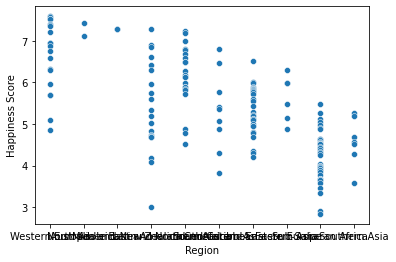

In [89]:
sns.scatterplot(x='Region',y='Happiness Score',data=df)

<AxesSubplot:xlabel='Standard Error', ylabel='Happiness Score'>

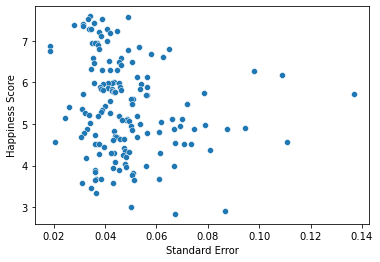

In [38]:
sns.scatterplot(x='Standard Error',y='Happiness Score',data=df)
#Standard error had a good relationship with Hapiness scores.

<AxesSubplot:xlabel='Economy (GDP per Capita)', ylabel='Happiness Score'>

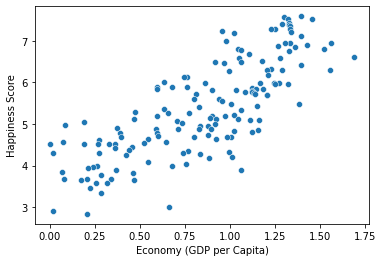

In [39]:
sns.scatterplot(x='Economy (GDP per Capita)',y='Happiness Score',data=df)
#Economy has the good relationship with Happiness Scorer.

<AxesSubplot:xlabel='Family', ylabel='Happiness Score'>

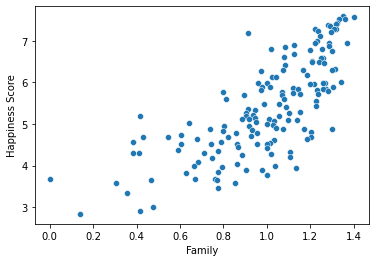

In [40]:
sns.scatterplot(x='Family',y='Happiness Score',data=df)
##Family has the good relationship with Happiness Score.

<AxesSubplot:xlabel='Health (Life Expectancy)', ylabel='Happiness Score'>

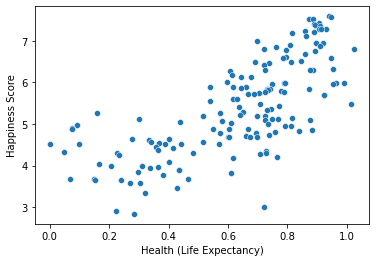

In [43]:
sns.scatterplot(x='Health (Life Expectancy)',y='Happiness Score',data=df)
#Health shows the importance for Happiness Score.

<AxesSubplot:xlabel='Dystopia Residual', ylabel='Happiness Score'>

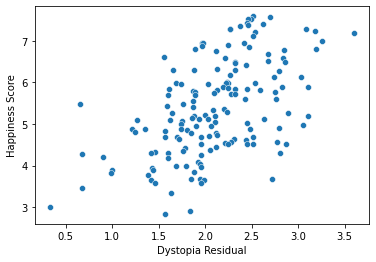

In [47]:
sns.scatterplot(x='Dystopia Residual',y='Happiness Score',data=df)
#Dystopia shoes very good importance for Happiness Score.

<AxesSubplot:xlabel='Trust (Government Corruption)', ylabel='Happiness Score'>

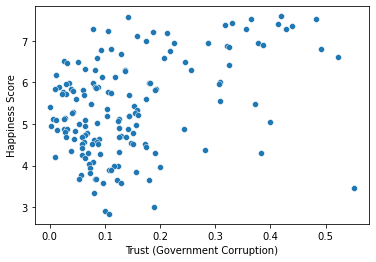

In [45]:
sns.scatterplot(x='Trust (Government Corruption)',y='Happiness Score',data=df)
#Trust also shows the good relationship with Happiness Score.

<AxesSubplot:xlabel='Generosity', ylabel='Happiness Score'>

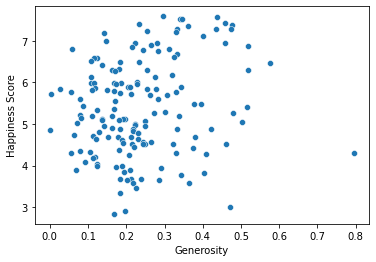

In [46]:
sns.scatterplot(x='Generosity',y='Happiness Score',data=df)
#TGenerosity  also shows the good relationship with Happiness Score.

In [97]:
X

,Region,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,9,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,9,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,9,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,9,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,5,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...
153,8,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,8,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,4,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,8,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [81]:
X=data[['Region','Standard Error',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual']]
#Fixing the features for train and test

In [88]:
Y=data['Happiness Score']
#Happiness Score as my label

In [98]:
Scaler=StandardScaler()
X_scaled=Scaler.fit_transform(X)
#Scaling the features using Standard scaler to bring normal scale..

In [99]:
X_scaled

array([[ 1.30025593, -0.80592569,  1.36962124, ...,  2.30965159,
         0.47103971,  0.75825809],
       [ 1.30025593,  0.05588945,  1.13522625, ..., -0.01647953,
         1.57585637,  1.09285682],
       [ 1.30025593, -0.8544869 ,  1.19286069, ...,  2.8427738 ,
         0.8242928 ,  0.71233526],
       ...,
       [-0.37544095,  0.13253425, -0.45524543, ...,  0.38141902,
         1.85689094, -3.20843049],
       [ 0.96511655,  2.26396166, -2.06756644, ..., -0.35771452,
        -0.31694987, -0.48198451],
       [ 0.96511655,  1.13418227, -1.58633379, ..., -0.30180313,
        -0.5581534 , -0.96361241]])

In [ ]:
#Train and test

In [101]:
X_train,X_test,Y_train,Y_test=train_test_split(X_scaled,Y,test_size=0.25,random_state=49)
Y_train.head()

128    4.307
18     6.937
109    4.686
80     5.194
83     5.140
Name: Happiness Score, dtype: float64

In [102]:
#Model initiing and training
regression=LinearRegression()
regression.fit(X_train,Y_train)

LinearRegression()

In [126]:
regression.score(X_train,Y_train)

0.9999999454605766

In [127]:
regression.score(X_test,Y_test)

0.9999999318873249

In [129]:
Y_pred=regression.predict(X_test)
Y_pred
#Before seeing the prediction for each rows we prediction 25% of rows

array([5.07328907, 4.07677248, 4.51227106, 5.10156777, 4.83921106,
       5.54818448, 5.88908959, 3.95557909, 4.29667176, 6.79765332,
       5.99512688, 7.37804976, 5.12422697, 4.71475907, 5.12315385,
       4.25201247, 5.39875434, 4.29254175, 4.73858485, 6.90132875,
       5.19227298, 4.57144121, 4.43553195, 5.98375267, 7.52691494,
       5.69519677, 6.57407283, 5.25282565, 3.81924731, 5.85527332,
       4.78795762, 7.58679041, 4.94876556, 6.94015239, 3.58684123,
       4.88452226, 4.85740542, 7.56083831, 5.87837366, 5.98703119])

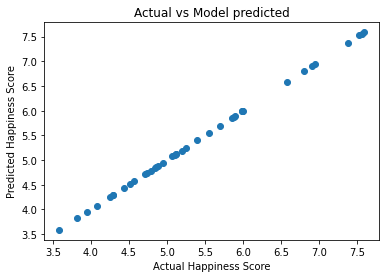

In [131]:
plt.scatter(Y_test,Y_pred)
plt.xlabel('Actual Happiness Score')
plt.ylabel('Predicted Happiness Score')
plt.title('Actual vs Model predicted')
plt.show()
#Graph to visualise..

In [133]:
#MODEL EVALUATION
from sklearn.metrics import mean_squared_error,mean_absolute_error
Y_pred=regression.predict(X_test)
mean_absolute_error(Y_test,Y_pred)

0.0002467371111242178

In [134]:
mean_squared_error(Y_test,Y_pred)

7.872383813340094e-08

In [136]:
np.sqrt(mean_squared_error(Y_test,Y_pred))

0.00028057768644958376